In [3]:
from typing import Dict, TypedDict,Literal
from langgraph.graph import StateGraph, END
from langchain_core.prompts import ChatPromptTemplate
from IPython.display import display, Image
from langchain_core.runnables.graph import MermaidDrawMethod

In [4]:
class PortfolioState(TypedDict):
    amount_usd:float
    total_usd:float
    total_inr:float
    target_currency : Literal["INR","EUR"]


In [5]:
def calc_total(state: PortfolioState) ->PortfolioState:
    state['total_usd'] =  state['amount_usd'] * 1.8
    return state

def convert_inr_usd(state: PortfolioState)->PortfolioState:
    state['total_inr'] =  state['amount_usd'] * .85
    return state

def convert_to_inr(state: PortfolioState)->PortfolioState:
    state['total_inr'] =  state['amount_usd'] * .9
    return state

def convert_to_eur(state: PortfolioState)->PortfolioState:
    state['total_inr'] =  state['amount_usd'] * .9
    return state

def choose_conversion(state: PortfolioState)->PortfolioState:
    return state['target_currency']

In [8]:
from langgraph.graph import StateGraph, START,END

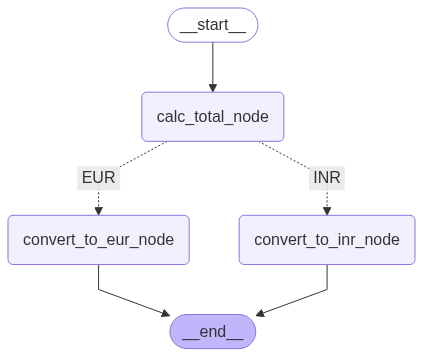

In [9]:
builder = StateGraph(PortfolioState)
builder.add_node('calc_total_node',calc_total)
builder.add_node('convert_to_inr_node',convert_to_inr)
builder.add_node('convert_to_eur_node',convert_to_eur)

builder.add_edge(START,'calc_total_node')
builder.add_conditional_edges(
    'calc_total_node',
    choose_conversion,
    {
        'INR':'convert_to_inr_node',
        'EUR':'convert_to_eur_node'
    }
)
builder.add_edge(['convert_to_inr_node','convert_to_eur_node'],END)
builder.compile()

In [10]:
builder = StateGraph(PortfolioState)

builder.add_node('calc_total_node',calc_total)
builder.add_node('convert_inr_usd_node',convert_inr_usd)

builder.add_edge(START,"calc_total_node")
builder.add_edge("calc_total_node","convert_inr_usd_node")
builder.add_edge("convert_inr_usd_node",END)
graph = builder.compile()



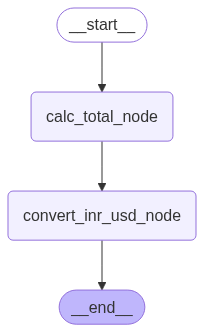

In [24]:
display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [12]:
graph.invoke({"amount_usd":3000,"target_currency":'INR'})

{'amount_usd': 3000,
 'total_usd': 5400.0,
 'total_inr': 2550.0,
 'target_currency': 'INR'}

In [13]:
1). 
 my ADO is not working -> LLM  ->
 1). category "bad experose" -> 
  2). "IT issue" -> "credentioan expores" 
  3).   => "reset the pasw" 
  4).    ->"summaryzation of issue" 


SyntaxError: invalid syntax (3685570728.py, line 1)